# Copiare una lista

Abbiamo visto che copiare in una lista l'operazione di assegnamento in realtà non copia la lista ma solo il riferimento alla lista, generando un alias.

In [5]:
l = ["a", "b", "c"]
m = l
# gli id di questi oggetti sono uguali, si tratta dello stesso oggetto
print(id(l), id(m))

140062880039808 140062880039808


Ogni modifica alla lista `l` si ripercuote su `m`:

In [3]:
l[0] = "ciao"
print(l, m)

['ciao', 'b', 'c'] ['ciao', 'b', 'c']


Se si vuole effettivamente copiare una lista, nel senso di generare una nuova lista con lo stesso contenuto, si possono usare la funzione `list` o il metodo `copy()`.

In [4]:
l1 = l.copy()
l2 = list(l)
# gli id di queste liste sono diversi: vuol dire che si tratta di oggetti distinti
print(id(l), id(l1), id(l2))

140062880030400 140062880283008 140062880347520


In [7]:
# le liste l1 ed l2 contengono comunque gli stessi elementi di l
print(l1)
print(l2)

['ciao', 'b', 'c']
['ciao', 'b', 'c']


# Funzioni che modificano variabili sul posto

Finora le funzioni che abbiamo scritte che operavano sulle liste o effettuvano solo operazioni di lettura, o generavano delle liste nuove, ma senza modificare le liste passate come paramentro. Consideriamo la funzione `reverse`.

In [9]:
def reverse(l):
    """
    Restituisce una nuova lista ottenuta da l ma procedendo dall'ultimo al primo elemento.
    """
    risultato = []
    for i in range(len(l)-1, -1, -1):
        risultato.append(l[i])
    return risultato

In [10]:
l = [1,2,3]
# chiamare reverse restituisce la lista [3,2,1], ma lascia inalterata l
reverse(l)

[3, 2, 1]

In [11]:
l

[1, 2, 3]

La funzione `reverse` si comporta quindi in maniera simile ai metodi che operano sulle stringhe come `lower` e `upper`, che generano una nuova stringa senza modificare quella originaria.

In [12]:
s = "ciao"
# restitusice una nuova stringa "CIAO"
s.upper()

'CIAO'

In [13]:
# ma la stringa in s è rimasta inalterata
s

'ciao'

Inveve, i metodi come `pop`, `remove`, `append`, etc... non si comportano in questo modo: non resituiscono nulla ma invece modificano la lista di partenza.

In [14]:
l = [4,5,6]
# append aggiunge un nuovo elemento alla lista: non restituisce nulla!!
l.append(10)

In [15]:
# ma dopo la sua esecuzione il valore di l è alterato
l

[4, 5, 6, 10]

Vogliamo scrivere una versione di `reverse` che si comporta come `append`, ovvero che non genera una nuova lista, ma modifica quella di partenza. Funzioni che modificano i parametri passati in input si dice che hanno *effetti collaterali* o anche che effettuano modifiche *sul posto* (*in place* in inglese).

## Come scambiare il valore di due variabili

Piccola parentesi, che sarà necessaria per la scrittura della nuova versione di `reverse`: come si scambiano due variabili ?

In [21]:
a = 5
b = 2
print(a, b)

5 2


In [22]:
# Questo metodo non funziona, perché i due assegnamenti vengono svolti uno dopo l'altro:
# - la prima istruzione (a = b) sovrascrive il valore di a con 2
# - quando la seconda istruzione viene eseguita, ormai a vale 2 e non più 5
a = b
b = a
print(a, b)

2 2


In [27]:
# Reimpostiamo a e b per fare un altro esperimento
a = 5
b = 2
print(a, b)

5 2


Per poter scambiare il valore di due variabili, occorre una terza variabile di appoggio dove salvare il valore della prima variabile che andiamo a sovrascrivere (`a` nel caso di sopra).

In [28]:
# salvo il valore di a nella variabile tmp
tmp = a
a = b
b = tmp
print(a, b)

2 5


## La funzione `reverse_inplace`

Quando si progetta un algoritmo, può essere utile pensare come noi come esseri umano potremmo risolvere quel problema nel mondo fisico. Al posto di una lista, supponiamo di avere una fila di carte da gioco, delle quali vogliamo invertire l'ordine. Il fatto che non vogliamo creare una nuova lista vuol dire che noi possiamo spostare queste carte e tenerle nelle mani, ma non possiamo utilizzare spazio sul tavolo per una seconda lista di carte.

Un modo per risolvere il problema potrebbe essere questo:
  * scambia la prima e l'ultima carta
  * scambia la seconda e la penultima
  * ....
  * ripeti finché hai scambiato tutte le carte

Cerchiamo di scrivere queste istruzioni in modo che assomiglino di più ad uno pseudo-codice:
  * ripetere per ogni carta, a partire da quella più a sinistra fino a quella centrale
    * scambia la carta considerata e quella che occupa la stessa posizione a partire da destra

Un primo pseudocodice può quindi essere:
```python
def reverse_inplace(l):
    for i in range(0, ultimo posizione da scambiare):
        # scambia l[i] con corrispondente elemento a partire dall'ultimo
```

Abbiamo visto prima come si scambiano due variabili tra di loro, ci rimane quindi da capire:
  * qual è l'ultima posizione da scambiare
  * quale elemento di `l` corrisponde all'emento `i` ma a partire dall'ultimo.

Per il secondo punto, notare che:
  * All'elemento in posizione 0 corrisponde all'elemento in posizione len(l)-1
  * All'elemento in posizione 1 corrisponde all'elemento in posizione len(l)-2
  * In generale, all'elemento in posizione i corrisponde all'elemento in posizione len(l) - 1 - i

Per il primo punto, invece, è ovvio che in qualche modo bisogna scambiare gli elementi dalla posizione 0 alla posizione di circa `len(l) // 2`, bisogna capire se a questo `len(l) // 2` bisogna aggiungere o togliere il numero 1. Facciamo qualche esempio:
  * se ci sono 4 elementi, le cui posizioni sono 0 1 2 3, dobbiamo scambiare l'elemento 0 (con 3) e 1 (con 2). Ovvero l'ultimo elemento da scambiare è quello in posizione `4 // 2 - 1 = 1`
  * se ci sono 5 elementi, le cui posizioni sono 0 1 2 3 4, scambiare ancora l'elemento 0 (con 3) e 1 (con 2). Ovvero l'ultimo elemento da scambiare è quello in posizione `5 // 2 - 1 = 1` 
  
Dunque l'ultimo elemento da scambiare è quello in posizione `len(l) // 2 - 1`.

Siamo pronti a scrivere il codice.

In [47]:
def reverse_inplace(l):
    """
    Inverte l'ordine degli elementi della lista l.
    """
    # Notare che l'ultimo elemento da scambiare è quello in posizione len(l)//2 - 1
    # nel range devo mettere len(l) // 2 perché il valore destro del range è escluso.
    for i in range(0, len(l) // 2):
        # scambiamo l[i] ed l[len(l) - i - 1]
        tmp = l[len(l) - i - 1]
        l[len(l) - i - 1] = l[i]
        l[i] = tmp

Proviamo se funziona.

In [31]:
l = ["a", "b", "c"]
m = l

In [32]:
reverse_inplace(l)

La funzione `reverse_inplace` sembra non abbia fatto nulla, ma in realà ha modifica il valore della lista `l` ( e quindi anche del suo alias `m`).

In [33]:
print(l)
print(m)

['c', 'b', 'a']
['c', 'b', 'a']


## Esecuzione passo-passo di `reverse_inplace`

Vediamo di provare ad eseguire passo-passo la funzione `reverse_inplace`. Non usiamo come al solito il modulo per l'esecuzione passo passo, perché vogliamo evidenziare con più precisione il contenuto di heap e stack. Consideriamo il seguente programma.

In [ ]:
def reverse_inplace(l):
    """
    Inverte l'ordine degli elementi della lista l.
    """
    # Notare che l'ultimo elemento da scambiare è quello in posizione len(l)//2 - 1
    # nel range devo mettere len(l) // 2 perché il valore destro del range è escluso.
    for i in range(0, len(l) // 2):
        # scambiamo l[i] ed l[len(l) - i - 1]
        tmp = l[len(l) - i - 1]
        l[len(l) - i - 1] = l[i]
        l[i] = tmp

k = [1, 2, 3]
l = k
reverse_inplace(l)

Dopo l'esecuzione delle linee 13 e 14, la situazione è la seguente:

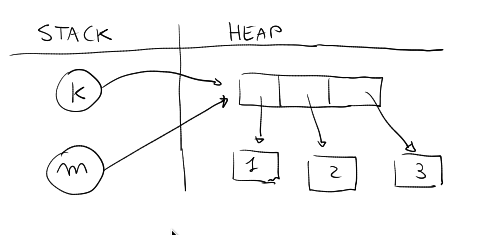

Notare che:
* `m` e `k` si riferiscono allo stesso oggetto;
* siamo stati particolarmente pedanti, e invece di mettere 1, 2 e 3 dentro la lista l, abbiamo più correttamente inserito dentro la lista dei riferimenti (frecce) a tre zone nello heap che contengono i numeri 1, 2 e 3 rispettivamente. Tale precisione è eccessiva quando si ha a che fare con i tipi immutabili, ma per una volta abbiamo voluto fare tutto con la massima precisione.

Alla riga 15 c'è la chiamata di funzione. Quello che succede è che:
* Le variabili `k` ed  `m` diventano *invisibili*: sono ancora lì, ma non vi si può accedere.
* Nello stack viene creata una nuova zona dedicata alle variabili locali: questa zona si chiama *record di attivazione*.
* Il valore dell'argomento `k` viene copiato nel paramatro `l`: per valore di `k` si intende il riferimento contenuto in `k`. Il risultato è che `l` punta allo stesso oggetto nello heap di `l` (in sostanza, è come se fosse stato eseguito l'assegnamento `l = k`).

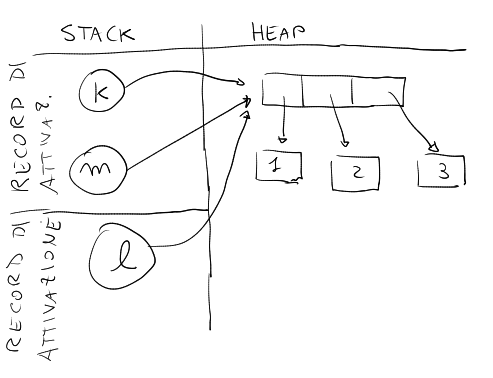

Con l'esecuzione della riga 8, viene creata una nuova variabile locale `i` che ha valore 0, e una nuova variabile locale `tmp` che ha valore uguale all'elemento in posizione `len(l) - i - 1 = 3 - 0 - 1 = 2` di `l`. Ancora una volta, non è che il valore in `l[2]` viene duplicato, ma la variabile `tmp` punta allo stesso oggetto di `l[2]`.

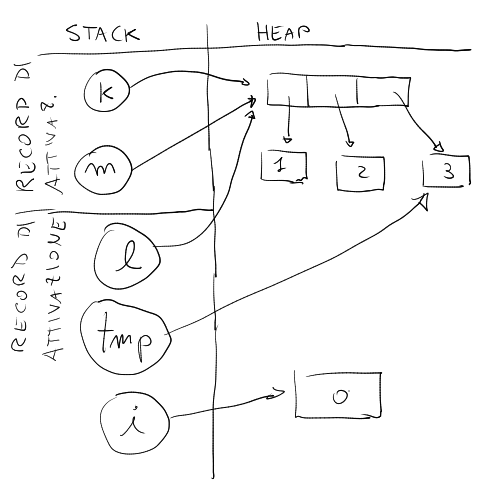

La riga 10 copia in `l[2]` il valore di `l[0]`. Ancora una volta, quello che vengono cambiati solo i rifetimenti.

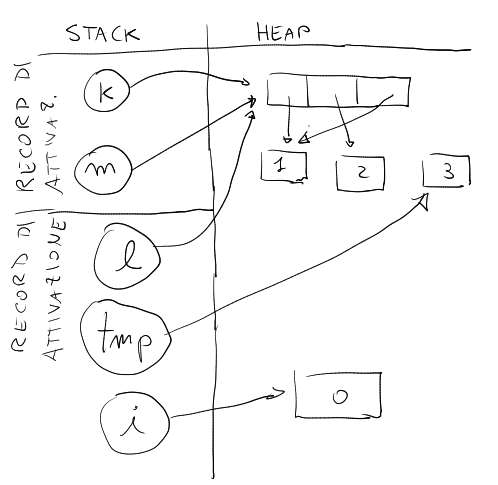

Infine, la riga 11 copia (il riferimento di) `tmp` in `l[0]`.

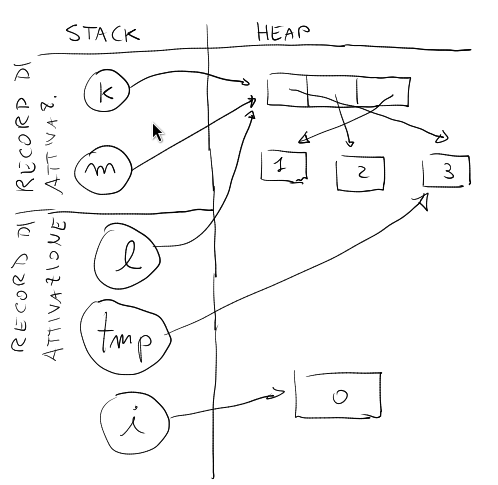

Il ciclo `for` non viene eseguito ulteriormente, e quindi si esce dalla funzione `reverse_inplace`. Il risultato è che il record di attivazione della funzione `reverse_inplace` viene distrutto, e la situazione diventa questa:

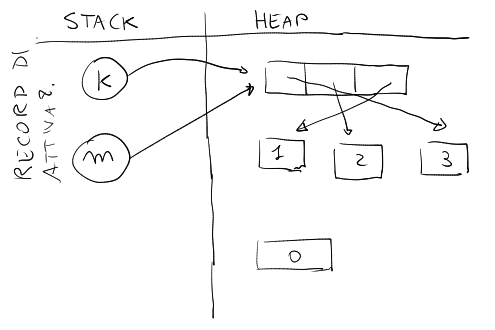

Dunque `k` ed `m` sono alias, ed entrambi uguali a `[3, 2, 1]`.

## Altri esempi

Vediamo adesso un altro esempio di funzione che modifica l'input sul posto, rimpiendo tutti gli elementi di una lista con uno stesso valore.

In [35]:
def fill_inplace(l, x):
    """
    Rimpiazza tutti gli elementi di l con x.
    """
    for i in range(len(l)):
        l[i] = x

In [36]:
l = ["a", "b", "c"]
fill_inplace(l, 99)

In [37]:
l

[99, 99, 99]

# Le tuple

Abbiamo detto varie volte che le liste sono tipi di dato mutabili. Tuttavia, Python mette a disposizione un altro tipo di dato, le tuple, che sono come le liste ma sono immutabili.

In [43]:
# Questa è una lista
[1, 2, 3]

[1, 2, 3]

In [38]:
# Il tipo di una lista è `list`
type([1, 2, 3])

list

Una lista si scrive come una tupla, ma senza le parentesi quadre.

In [39]:
# Questa è una tupla
1, 2, 3

(1, 2, 3)

In [40]:
t = 1,2,3
type(t)

tuple

Tutto ciò che si può fare con le liste che non comporti modifiche su può fare anche sulle tuple.

In [41]:
# Accesso ad un elemento
t[0]

1

In [42]:
# Cicli
for i in t:
    print(i)

1
2
3


In [43]:
# Questo non è ammesso
t[0] = 'ciao'

TypeError: 'tuple' object does not support item assignment

In [44]:
# Il metodo append non esiste
t.append("ciao")

AttributeError: 'tuple' object has no attribute 'append'

## Assegnamenti multipli

La cosa interessante delle tuple è che è possibile assegnare il valore dei componenti delle tuple a singole variabili.

In [48]:
t = 4,5,6

Se vogliamo assegnare i tre elmenti di `t` alle variabili `a`, `b` e `c` rispettivamente, un modo è quello classico con tre assegnamenti per accedere ai tre elementi della tupla.

In [49]:
a = t[0]
b = t[1]
c = t[2]
print(a, b, c)

4 5 6


Tuttavia, un altro modo consiste nel mettere a sinistra dell'uguale le tre variabili a cui vogliamo assegnare i valori della tupla, separate da virgola.

In [50]:
t = "ciao", "sono", "io"

In [56]:
a, b, c = t
print(a, b, c)

ciao sono io


Se il numero di variabili a sinistra dell'uguale è sbagliato, si ottiene un errore.

In [55]:
a, b = t

ValueError: too many values to unpack (expected 2)

In realtà questo meccanismo funziona anche con le liste.

In [54]:
l = [10, 20, 30]
a, b, c = l
print(a, b, c)

10 20 30


Questo metodo si può usare anche per assegnare contemporaneamente più variabili in una unica istruzione di assegnamento.

In [58]:
# Assegna ad a la stringa "ciao" e alla variabile b l'intero 23
a, b = "ciao", 23

Il tutto funziona perché `"ciao", 23` costruisce una tupla il cui primo elemento è `"ciao"` e il secondo e `23`, e l'assegnamento distribuisce questi due valori sulle variabili `a` e `b`. In questo modo è possibile scambiare il valore di due variabili senza avere bisogno di una variabile temporanea.

In [60]:
a, b = 10, 20
print(a, b)
a, b = b, a
print(a, b)

10 20
20 10


## Funzioni che restituiscono più valori

Un utilizzo comune delle tuple è quando una funzione vuole restituire più valori. È una cosa che abbiamo già visto con il metodo `getMouse` della libreria ezgraphics. Per acquisire il punto dove è stato effettuato il click del mouse, l'istruzione che abbianmo usato è 
```python
x, y = win.getMouse()
```

In realtà, il metodo `getMouse` non restituisce più valori, ma una tupla contenente le coordinate `x` ed `y` del click. Vediamo ora di realizzare noi una funzione di questo tipo. La funzione che segue determina sia l'area che il perimetro di una rettangolo di data base ed altezza.

In [61]:
def area_perimetro_rettangolo(base, altezza):
    """
    Restitusice la tuple (a, p) dove a è l'area e p il perimetro di un rettangolo di data base e altezza.
    """
    area = base * altezza
    perimetro = 2* (base + altezza)
    return area, perimetro

In [62]:
# Se chiamo la funzione di cui sopra, mi restituisce una tupla
area_perimetro_rettangolo(2, 5)

(10, 14)

In [63]:
# Posso chiamare la funzione e contemporaneamente assegnare i due elementi della tupla
# a due variabili distinte
a, p = area_perimetro_rettangolo(2, 5)
print(a, p)

10 14


Questa cosa funzionerebbe anche restituendo una lista invece di una tupla. Perché allora usare una tupla ? In generale, è molto più efficiente costruire una tupla con pochi elementi che una lista con molti elementi, quindi le tuple sono da preferire in questo tipo di applicazione.

## Funzioni che accettano un numero variabile di argomenti

Un'altra applicazione delle tuple è per scrivere una funzione che accettano un numero variabile di parametri. Esempi di queste funzoni in Python sono `print`, `min` e `max`. Ma come possiamo scrivere una funzione di questo tipo ? È sufficiente mettere un asterisco `*` davanti al nome dell'ultimo parametro della funzione. L'asterisco sta ad indicare che li argomenti successivi verrano tutti impacchettati in una tupla che verrà poi copiata in quel parametro.

In [65]:
def somma_tutto(*args):
    # Tutti gli argomenti di somma_tutto verranno inseriti in args sotto forma di tupla.
    """
    Restuisce la somma_tutto di tutti i parametri in input. Ad esempio,
    somma(2, 3, 5) restituirà 10.
    """
    # Il codice che segue è identico a quello che abbiamo già scritto che esegue
    # la somma degli elementi di una lista, solo che args non è una lista ma una
    # tupla.
    risultato = 0
    for x in args:
        risultato += x
    return risultato

Il parametro `args` viene talvolta chiamato *argomento a lunghezza variable* (*variable-length argument* in inglese, anche noto con l'abbreviazione di *vararg*).

In [66]:
somma_tutto(3, 5, 6)

14

In [67]:
somma_tutto()

0

Si nodi che il codice di `somma_tutto` è praticamente identico al codice di `somma_lista` della lezione precedente, che copio qui.

In [68]:
def somma_lista(l):
    """Restituisce la somma degli elementi di l."""
    somma = 0
    for e in l:
        somma += e
    return somma

La differenza è essenzialmente nel parametro, che in `somma_lista` appare normale, mentre in `somma_tutto` appare con l'asterisco. Questo vuol dire che l'argomento di `somma_lista` prende un unico parametro, che può essere una lista, o un numero, o un qualunque tipo si possa "scorrere" con `for`, mentre `somma_tutto` prende un numero variabile di argomenti che saranno da Python stessi impacchettati in una tupla.

In [69]:
# In somma_tutto gli elementi da sommare vanno scritti come differenti argomenti della funzione
print(somma_tutto(3, 4, 5))
# In somma_lista gli elementi da sommare vanno inseriri in una lista, che sarà l'unico argomento della funzione
print(somma_lista([3, 4, 5]))


12
12


Si noti che con il comando `help(print)` compare l'help in linea del comand `print`, dove si vede che il primo parametro è `*args`, proprio come nel nostro esempio. Attenzione che:
  * può esserci un solo parametro con l'asterisco;
  * non è necessario chiamare `args` il nome di questo parametro, anche se è consuetudine.


In [74]:
help(print)

Help on built-in function print in module builtins:

print(*args, sep=' ', end='\n', file=None, flush=False)
    Prints the values to a stream, or to sys.stdout by default.

    sep
      string inserted between values, default a space.
    end
      string appended after the last value, default a newline.
    file
      a file-like object (stream); defaults to the current sys.stdout.
    flush
      whether to forcibly flush the stream.



# Misura del tempo di esecuzione

Fin'ora abbiamo ignorato del tutto considerazioni sul tempo di esecuzione dei programmi. Praticamente tutti i programmi che abbiamo provato hanno tempi di esecuzione istantanei (a parte i programmi di elaborazione delle immagini). Tuttavia, i tempi erano istantanei anche perché i dati su cui applicarli erano piccoli. Ma quando la quantità dei dati da elaborare cresce, possono nascere problemi.

Vedremo adesso come misurare il tempo di esecuzione dei programmi. In particolare, vogliamo studiare il problema di trovare un elemento in una lista: nella lezione del 16 novembre abbiamo chiamato questa funzione `cerca`, qui ne riscrivo il codice con il nome di `linear_search`.

In [29]:
def linear_search(l, x):
    """
    Restituisce la posizione di x in l se esiste, altrimenti restituisce -1.
    """
    for i in range(len(l)):
        if l[i] == x:
            return i
    return -1

Questo algoritmo è effettivamente con il nome di *riceca lineare* o *ricerca sequenziale*. Si tratta del primo algoritmo a cui diamo un nome, non tanto per merito suo, quanto per distignuerlo dall'algoritmo molto più sofisticato di *ricerca binaria* che vedremo in una prossima lezione.

Siccome vogliamo provare le prestazioni di questo algoritmo, ha senso utilizzare una lista abbastanza lunga su cui testarlo.  Per far ciò, utilizziamo il file *words.txt* che contiene una serie di parole prese da un dizionario inglese, che carichiamo e inseriamo nella lista words con il codice qui sotto (potete igorare il codice).

In [31]:
with open("words.txt", "r") as f:
    words = f.read().splitlines()
words.sort()

In [32]:
words

['&c',
 "'d",
 "'em",
 "'ll",
 "'m",
 "'mid",
 "'midst",
 "'mongst",
 "'prentice",
 "'re",
 "'s",
 "'sblood",
 "'sbodikins",
 "'sdeath",
 "'sfoot",
 "'sheart",
 "'shun",
 "'slid",
 "'slife",
 "'slight",
 "'snails",
 "'strewth",
 "'t",
 "'til",
 "'tis",
 "'twas",
 "'tween",
 "'tween-decks",
 "'twere",
 "'twill",
 "'twixt",
 "'twould",
 "'un",
 "'ve",
 '-i-',
 "-n't",
 '-o-',
 "-s'",
 '10-point',
 '1080',
 '10th',
 '11-point',
 '12-point',
 '16-point',
 '18-point',
 '1st',
 '2',
 '2,4,5-t',
 '2,4-d',
 '20-point',
 '2D',
 '2nd',
 '3-D',
 '30-30',
 '3D',
 '3M',
 '3rd',
 '4-D',
 '48-point',
 '4GL',
 '4H',
 '4th',
 '5-T',
 '5-point',
 '5th',
 '6-point',
 '6th',
 '7-point',
 '7th',
 '8-point',
 '8th',
 '9-point',
 '9th',
 'A&M',
 'A&P',
 "A'asia",
 'A-1',
 'A-OK',
 'A-and-R',
 'A-axes',
 'A-axis',
 'A-blast',
 'A-bomb',
 'A-day',
 'A-flat',
 'A-frame',
 'A-line',
 'A-one',
 'A-pole',
 'A-scope',
 'A-shaped',
 'A-sharp',
 'A-tent',
 'A-war',
 'A-weapons',
 'A.',
 'A.A.A.',
 'A.B.',
 'A.B.A.',


La lista è composta da quasi 500.000 elementi.

In [33]:
len(words)

466550

Se proviamo a cercare una parola, per esempio `dog`, l'esecuzione della funzione linear_search è comunque immediata.

In [34]:
linear_search(words, "dog")

169365

La cosa più lenta che possiamo fare è cercare un parola che non esiste, perché in tal caso l'algoritmo di ricerca sequenziale dovrà scorrere tutta la lista per constatare che la parola non si troval al suo interno. Anche in questo caso, la risposta è praticamente immediata.

In [35]:
linear_search(words, "abcxyz")

-1

Potremmo ovviamente provare con una lista ancora più grande, ma una alternativa è eseguire `linear_search` molte volte, vedere il tempo totale di esecuzione e poi dividere per il numero di volte che l'abbiamo eseguita. Fortunantamente, all'interno dei notebook c'è una funzionalità (che non ha niente a che fare con Python) per misurare il tempo di esecuzione di una cella. Basta inserire `%%timeit` come prima riga di una cella, e VSCode proverà a calcolare il tempo di esecuzione della cella come spiegato sopra, facendo delle esecuzioni ripetute ed estraendo il tempo medio.

In [39]:
%%timeit
linear_search(words, "dog")

14.3 ms ± 647 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Il risultato è che per cercare la stringa `"dog"` all'interno della lista, ci mette in media 14.3 millsecondi con una deviazione standard di meno di un millisecondo. Questi risultati ovviamente dipendono in maniera determinante dal computer nel quale viene eseguita la misurazione, e se ci riprovate sul vostro computer otterrete probabilmente valori diversi.

Se si prova a cercare un stringa che non esiste, ci aspettiamo che il tempo di esecuzione sia superiore.

In [40]:
%%timeit
linear_search(words, "abcxyz")

39.8 ms ± 914 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Il tempo di esecuzione medio è circa 2.5 volte il precedente. D'altronde, la lunghezza della lista wods è 466550 mentre la posizione della stringa `dog` nella lista è 169365. Pertano, quando linear_search viene chiamata con la stringa `dog`, deve controllare solo 169366 posizioni, quando viene chiamata con una stringa inesistente ne deve controllare 466550, e 466550 / 169365 è circa 2.75.

Ovviamente le prestazioni migliori si avranno se cerco il primo elemento della lista.

In [42]:
words[0]

'&c'

In [44]:
%%timeit
linear_search(words, "&c")

362 ns ± 9.62 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Vediamo che il tempo di esecuzione è enormemente più piccolo: 362 nanosecondi.

Vedremo nella prossima lezione che, quando la lista è ordinata, c'è un metodo molto più efficiente per trovare un elemento in un array, noto come *ricerca binaria*.